In [1]:
import sys
!{sys.executable} -m pip install pandas matplotlib colour numpy

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
plt.close("all")
dir_logs = "./logs/"
tick_file = "strategy-tick.csv"
update_file = "state-update.csv"

In [4]:
def get_timestamp_payload(path):
    raw_data = pd.read_csv(path)
    data = raw_data[["jsonPayload.message", "timestamp"]]
    data.columns = ["payload", "timestamp"]
    data = data.assign(payload_timestamp = data["payload"].str.extract(r'(.+?(?=\shopr:cover-traffic\s))'))
    data["payload"] = data["payload"].str.extract(r'hopr:cover-traffic\s(.*)')
    return data

In [5]:
def parse_strategy_tick(data):
    data = data.assign(tick_timestamp = data["payload"].str.extract(r'strategy tick:\s?(\d*)\s', expand=False))
    data = data.assign(balance = data["payload"].str.extract(r'balance:\s?(\d*)\s'))
    data = data.assign(rounded_balance = data["balance"].astype(float).div(1e18))
    data = data.assign(open_to_node = data["payload"].str.extract(r'open:\s?([\w\,]*)\s'))
    data = data.assign(close_to_node = data["payload"].str.extract(r'close:\s?([\w\,]*)\s?'))
    data["tick_timestamp"] =  pd.to_datetime(data["tick_timestamp"].apply(pd.to_numeric), unit="ms")
    return data[["timestamp", "payload_timestamp", "tick_timestamp", "balance", "rounded_balance", "open_to_node", "close_to_node"]]

In [6]:
tick_logs = parse_strategy_tick(get_timestamp_payload(dir_logs + tick_file))

In [7]:
tick_logs

,timestamp,payload_timestamp,tick_timestamp,balance,rounded_balance,open_to_node,close_to_node
0,2021-10-06T20:12:18.766992074Z,2021-10-06T20:12:18.766Z,2021-10-06 20:12:18.765,100999999999999996000,101.0,16Uiu2HAmRmAy6y2FpSHDe9mWN2aNKCM3RkZTdKwpUhbqY...,16Uiu2HAmEZbm7BUyBb9gbTNdx3wnnRQF7DprgZri2WtFM...
1,2021-10-06T20:11:31.566462125Z,2021-10-06T20:11:31.565Z,2021-10-06 20:11:31.564,100999999999999996000,101.0,,16Uiu2HAmEZbm7BUyBb9gbTNdx3wnnRQF7DprgZri2WtFM...
2,2021-10-06T20:11:20.921001169Z,2021-10-06T20:11:20.919Z,2021-10-06 20:11:20.919,100999999999999996000,101.0,,
3,2021-10-06T20:11:10.204744160Z,2021-10-06T20:11:10.203Z,2021-10-06 20:11:10.203,100999999999999996000,101.0,,
4,2021-10-06T15:22:30.361281700Z,2021-10-06T15:22:30.360Z,2021-10-06 15:22:30.359,999999999999996000,1.0,16Uiu2HAmFuWT65Cqv774Byp5TS7w1zpKDK13eRwW1GZdQ...,
5,2021-10-06T15:22:20.096595456Z,2021-10-06T15:22:20.094Z,2021-10-06 15:22:20.094,999999999999996000,1.0,,
6,2021-10-06T15:22:09.285830267Z,2021-10-06T15:22:09.284Z,2021-10-06 15:22:09.284,999999999999996000,1.0,,
7,2021-10-06T15:21:59.085901804Z,2021-10-06T15:21:59.084Z,2021-10-06 15:21:59.084,999999999999996000,1.0,,
8,2021-10-06T15:21:48.888723102Z,2021-10-06T15:21:48.887Z,2021-10-06 15:21:48.887,999999999999996000,1.0,,
9,2021-10-06T15:21:38.437779138Z,2021-10-06T15:21:38.436Z,2021-10-06 15:21:38.436,999999999999996000,1.0,,


In [8]:
tick_logs.dtypes

timestamp                    object
payload_timestamp            object
tick_timestamp       datetime64[ns]
balance                      object
rounded_balance             float64
open_to_node                 object
close_to_node                object
dtype: object

<AxesSubplot:xlabel='tick_timestamp'>

<Figure size 432x288 with 0 Axes>

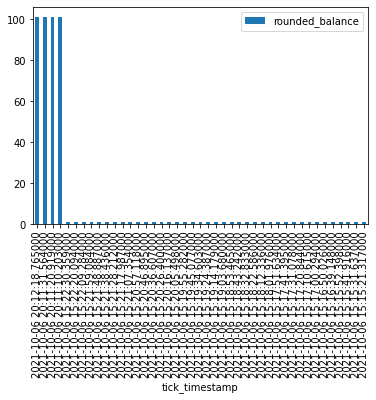

In [9]:
plt.figure()
tick_logs.plot(x="tick_timestamp", y="rounded_balance", kind="bar")